# Anomaly Detection for Software Vulnerabilities 
## An approach to evaluate a data set if it represents normal behaviour

*What is Normal Behaviour?*

When testing software, especially in the area of dynamic analysis, the goal is to uncover vulnerabilities that occur as a function of dynamic runtime parameters, such as varying input parameters, runtime environment, or user interaction. In our case, we are interested in how the runtime environment of our system under test behaves depending on these test strategies. **By normal behavior in this context, we mean the behavior of our system during testing to trigger and detect possible vulnerabilities.** By recording the runtime parameters, machine learning models can be used in the anomaly detection domain to predict and diagnose faulty behavior. These models make it possible to focus on behaviors where errors would have the greatest impact, as well as unlikely behaviors where previously undetected errors may lie. Ultimately, deviations from normal behavior in safety and reliability can be identified, revealing erroneous or even malicious behavior.
Reducing these anomalies ensures a more robust application.





* Is the behaviour actually regular?
* How can you model the behaviour?
* How do you define a major deviation from your expectation?
* Is it actually valuable to detect surprises and deviations from your expectation?

In [2]:
# Imports
import sys
sys.path.append("..")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from model.helpers import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
# load all the data
TRAIN = {}
TEST = {}
VALIDATION = {}

path = "../../data/interim/"
train = "train_"
test = "test_"
validation = "validation_"
#  list of scenarios
scenarios = [
        'CVE-2012-2122',
        'CVE-2020-9484'
]

for i in range(0,len(scenarios)):
    TRAIN[scenarios[i]]= pd.read_pickle(path + "/" + train + scenarios[i] + ".pkl")
    TEST[scenarios[i]] = pd.read_pickle(path + "/" + test + scenarios[i] + ".pkl")
    VALIDATION[scenarios[i]] = pd.read_pickle(path + "/" + validation + scenarios[i] + ".pkl")
            

In [5]:
# create empty list do concenate everything at the end
dfs_train = []
# create a column for each scenario name
for key in TRAIN.keys():
    TRAIN[key]['scenario'] = key
    temp_df = TRAIN[key]
    dfs_train.append(temp_df)
TRAIN['ALL'] = pd.concat(dfs_train)

dfs_test = []
for key in TEST.keys():
    TEST[key]['scenario'] = key
    temp_df = TEST[key]
    dfs_test.append(temp_df)
TEST['ALL'] = pd.concat(dfs_test)

dfs_validation = []
for key in VALIDATION.keys():
    VALIDATION[key]['scenario'] = key
    temp_df = VALIDATION[key]
    dfs_validation.append(temp_df)
VALIDATION['ALL'] = pd.concat(dfs_validation)


In [6]:
# data  
train = TRAIN['ALL']
test = TEST['ALL']

## CVE-2012-2122

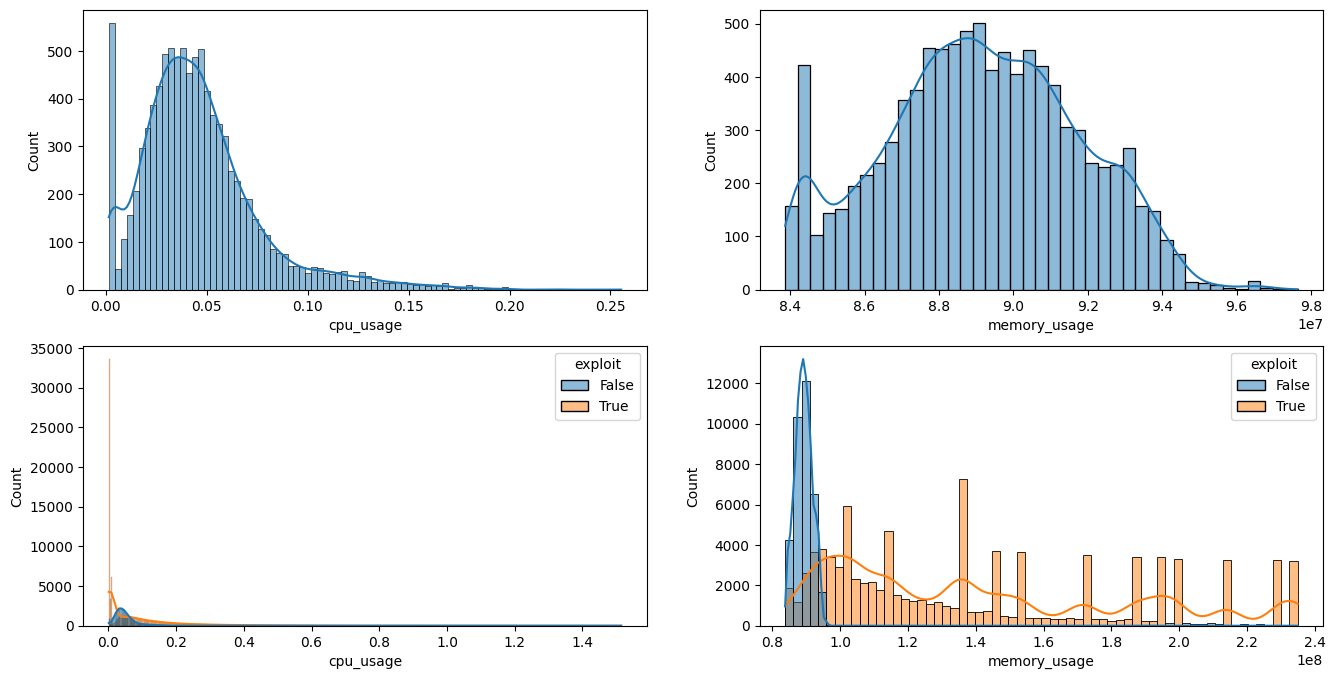

In [12]:
#  Histplot
fig, axes  = plt.subplots(2,2, sharex=False, figsize=(16,8))
sns.histplot(data=train[train['scenario']=='CVE-2012-2122'], x='cpu_usage', kde=True,  ax=axes[0,0])
sns.histplot(data=train[train['scenario']=='CVE-2012-2122'], x='memory_usage', kde=True,  ax=axes[0,1])
sns.histplot(data=test[test['scenario']=='CVE-2012-2122'], x='cpu_usage', kde=True, hue='exploit', ax=axes[1,0])
sns.histplot(data=test[test['scenario']=='CVE-2012-2122'], x='memory_usage', kde=True, hue='exploit', ax=axes[1,1])
plt.show()
fig.savefig("../../src/plots/EDA/CVE_2012_2122/Histplots_CVE-2012-2122.png")

## CVE-2020-9484